In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
from nsc_model import nsc_model
from Constants import Constants
from scipy.integrate import quad
from astropy.table import Table

c=Constants()

%matplotlib inline

# set some figure options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

# random walk example (via 2-body scattering)

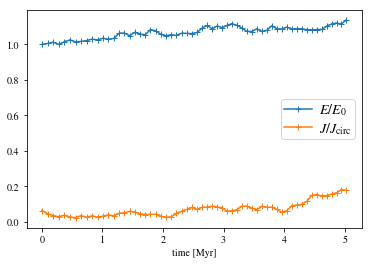

In [2]:
n=nsc_model(Mbh=1.e6*c.msun,  # black hole mass of 1e6 solar masses
            ms=c.msun,        # stellar mass of 1 solar mass
            gamma=2,         # rho(r) \propto r^-gamma, here we set gamma=2
            rm_o_rh=1.,       # r_m / r_h -- the ratio of the radius enclosing a certain mass of stars to the sphere of influence radius 
            mrm_o_mbh=2.)     # mass in stars / Mbh within r_m

rt = 1*(n.Mbh/n.ms)**(1./3.)*1*n.c.rsun  # specify the tidal radius

# establish some initial energy/angular momentum condition
E0 = n.E(c.pc)
J0  = 30*n.Jlc(E0,rt)

# loop over orbits
Norb = 60

E = E0
J = J0
t = 0.0
data_arr = []
for i in range(Norb):
    data_arr.append([i,t,E,J])
    
    # delta E and Delta J are drawn from normal distributions with sigma = RMS 
    a = n.a(E)
    DeltaE = np.random.normal(scale=n.DeltaErms(a))
    DeltaJ = np.random.normal(scale=n.DeltaJrms(a))
    Porb = n.P(a)
    
    
    # update
    E += DeltaE
    J += DeltaJ
    t += Porb
    
    
    
EJ_time = Table(np.array(data_arr),names=['orb','time','E','J'])

plt.plot(EJ_time['time']/(1.e6*c.yr),EJ_time['E']/EJ_time['E'][0],'+-',label=r'$E/E_0$')
plt.plot(EJ_time['time']/(1.e6*c.yr),EJ_time['J']/n.Jc(n.a(E0)),'+-',label=r'$J/J_{\rm circ}$')

plt.xlabel('time [Myr]')
plt.legend(loc='best')